In [47]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [12]:
# Read crypto_data.csv into Pandas

file_path = Path("crypto_data.csv")
df = pd.read_csv(file_path, index_col = 0)

In [13]:
df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [14]:
# Discard all cryptocurrencies that are not being traded. In other words, 
# filter for currencies that are currently being traded. Once you have 
# done this, drop the IsTrading column from the dataframe.

df = df.loc[df['IsTrading'] == True]
df = df.drop(columns = 'IsTrading')

In [15]:
# Remove all rows that have at least one null value.

df.dropna(inplace = True)
df.shape

(685, 5)

In [16]:
# Filter for cryptocurrencies that have been mined. 
# That is, the total coins mined should be greater than zero.

df = df.loc[df['TotalCoinsMined'] > 0]

In [17]:
#delete the CoinName from the ORIGINAL dataframe

new_df = df.drop(columns=['CoinName'])

In [18]:
# convert the remaining features with text values, 
# Algorithm and ProofType, into numerical data
# use Pandas to create dummy variables. Examine the number of 
# rows and columns of your dataset now

X = pd.get_dummies(new_df, columns = ['Algorithm', 'ProofType'])
X.shape




(532, 98)

In [20]:
# Standardize your dataset so that columns that contain larger values do not unduly influence the outcome

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)


In [22]:
# Perform dimensionality reduction with PCA (explained variance 90% (.9))

from sklearn.decomposition import PCA

pca = PCA(n_components=0.9)
df_pca = pca.fit_transform(scaled_data)



In [33]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.0279317 , 0.02141802, 0.02051615, 0.02044661, 0.0204466 ,
       0.0204466 , 0.0204466 , 0.02042554, 0.01870913, 0.01756291,
       0.01741106, 0.01629007, 0.01596154, 0.01551138, 0.01435005,
       0.01321122, 0.01236583, 0.01206255, 0.01104295, 0.01071499,
       0.01049079, 0.01040887, 0.01039089, 0.01037741, 0.01035414,
       0.01034034, 0.01029605, 0.01028233, 0.01028139, 0.01028139,
       0.01028138, 0.01027965, 0.01027051, 0.01026331, 0.01026202,
       0.01025761, 0.01025565, 0.01025068, 0.01024924, 0.01024279,
       0.01024259, 0.01024259, 0.0102419 , 0.01024018, 0.01023676,
       0.01023495, 0.01023   , 0.01022442, 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ])

In [34]:
#further reduce the dataset dimensions with t-SNE and visually inspect the results

from sklearn.manifold import TSNE

tsne = TSNE(learning_rate=100)
transformed_features = tsne.fit_transform(df_pca)

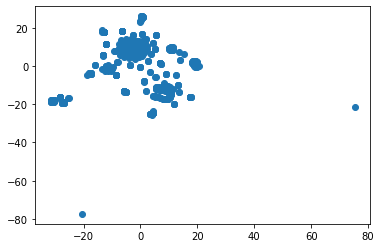

In [40]:
# plot


X['x'] = transformed_features[:,0]
X['y'] = transformed_features[:,1]

plt.scatter(X['x'], X['y'])
plt.show()

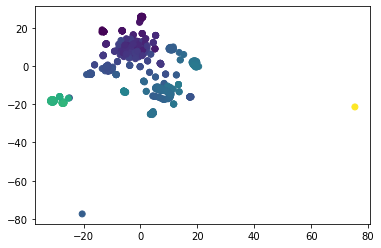

In [44]:
plt.scatter(X['x'], X['y'], c=df['y'])
plt.show()

In [48]:
# Create an elbow plot to identify the best number of clusters. 
# Use a for-loop to determine the inertia for each k between 1 through 10

from sklearn.cluster import KMeans

inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,3.542739e+24
1,2,1.061346e+24
2,3,6.224534e+23
3,4,2.450600e+23
4,5,1.284591e+23


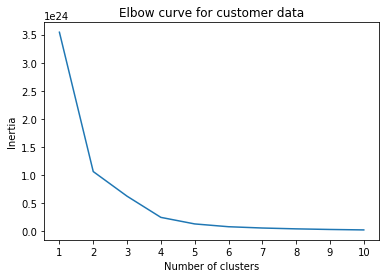

In [49]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

In [ ]:
# this set of cryptocurrencies can be divided into 3 (possibly 4) subsets. 